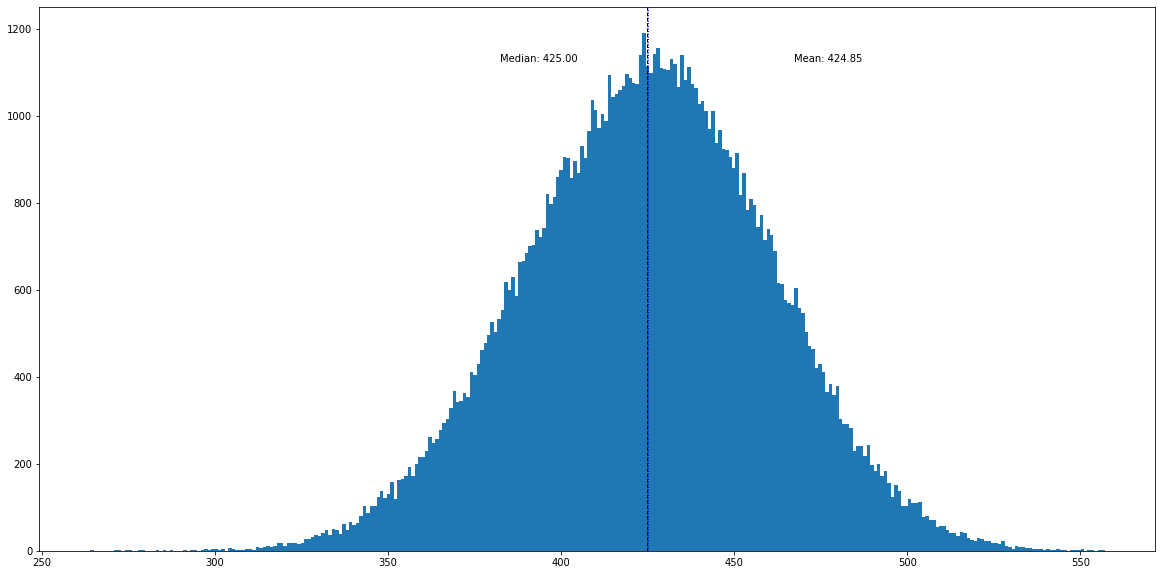

In [1]:
# Distribution of results
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

version = "topola"

dataset = pd.read_csv('100k_' + version + '/dataset1_100.csv')
x = np.asarray(dataset['y'].to_numpy())
plt.figure(figsize=(20,10))
length = np.max(x) - np.min(x) + 1
plt.hist(x, length)

plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))


plt.axvline(np.median(x), color='b', linestyle='dotted', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(x)*0.9, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(x)))
plt.savefig(version + '_distribution.png')
plt.show()

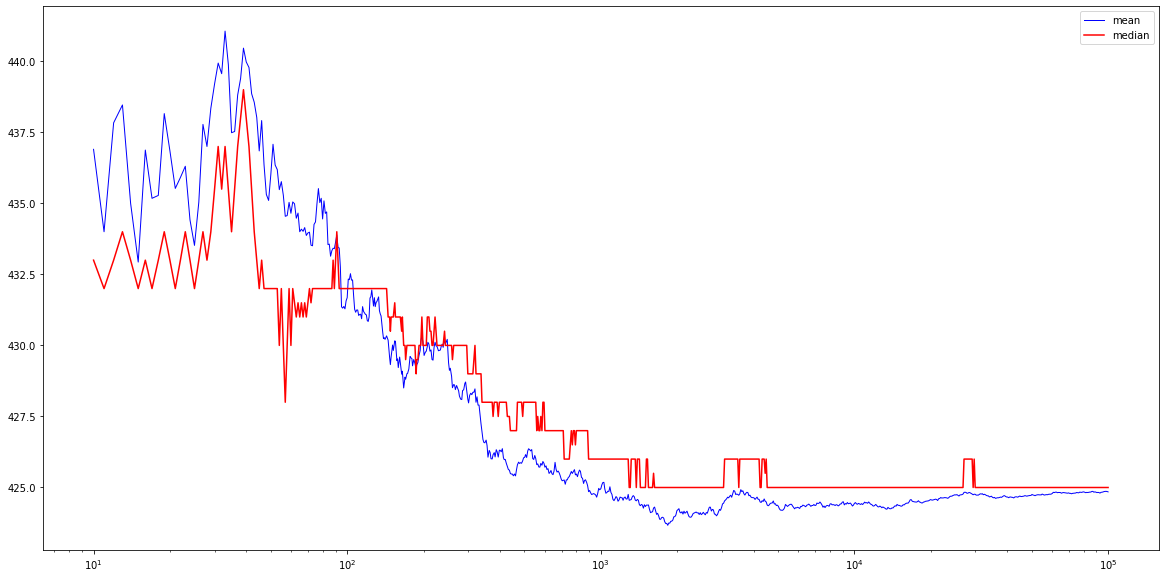

In [2]:
# Convergence to the mean
%matplotlib inline

ax = np.logspace(1, 5, 1001, dtype = int)

avg, median = [], []

for i in ax:
    avg.append(np.mean(x[0:i]))
    median.append(np.median(x[0:i]))
    
plt.figure(figsize=(20,10))
plt.plot(ax, avg, 'b', linewidth=1, label = "mean")
plt.plot(ax, median, 'r', label = "median")
plt.xscale('log')
plt.legend()
plt.savefig("convergence.png")
plt.show()


4.832705168024707 3.0298042430192544
KstestResult(statistic=0.02793161326629834, pvalue=0.41240477298486444)
424.84559 35.53888106780938
KstestResult(statistic=0.012961608257979984, pvalue=5.110339543125072e-15)


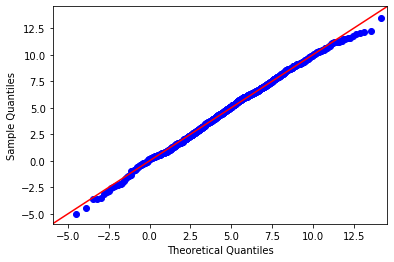

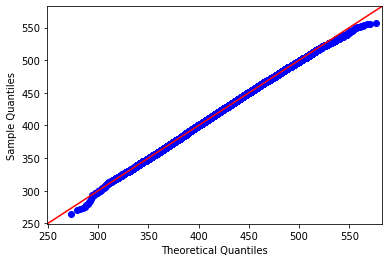

In [3]:
# Checking normality of dataset
%matplotlib inline

x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)

def test(data):
    avg = float(np.mean(data))
    var = float(np.var(data, ddof=0))
    var = pow(var, 1/2)
    print(avg, var)
    print(stats.kstest(data, 'norm', args=(avg, var)))
    sm.qqplot(data, loc=avg, scale=var, line='45')
    plt.show()

test(x_1000)
test(x)